In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datasets/IMDB Dataset.csv", encoding="unicode_escape")
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [3]:
# cleandf = df[["text","sentiment"]]
cleandf = df[["review","sentiment"]]
cleandf.columns = ["text", "sentiment"]
cleandf.head()

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
cleandf["sentiment"].unique()

array(['positive', 'negative'], dtype=object)

<Axes: xlabel='sentiment', ylabel='count'>

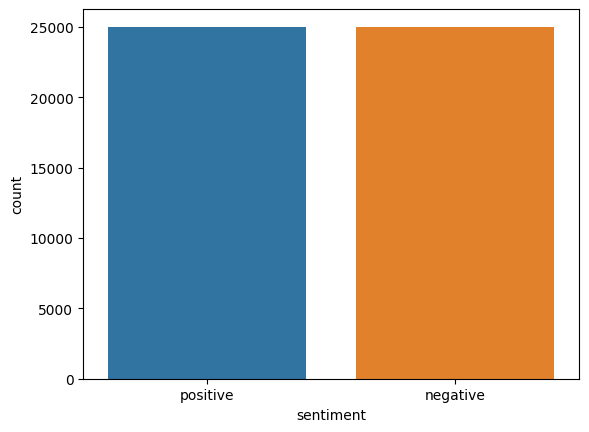

In [5]:
sns.countplot(x="sentiment", data=cleandf)

In [6]:
cleandf["score"] = cleandf["sentiment"].apply(lambda x: 0.0 if x.lower() == 'negative' else 0.5 if x.lower() == 'neutral' else 1.0)
cleandf.head(), cleandf["score"].unique()

(                                                text sentiment  score
 0  One of the other reviewers has mentioned that ...  positive    1.0
 1  A wonderful little production. <br /><br />The...  positive    1.0
 2  I thought this was a wonderful way to spend ti...  positive    1.0
 3  Basically there's a family where a little boy ...  negative    0.0
 4  Petter Mattei's "Love in the Time of Money" is...  positive    1.0,
 array([1., 0.]))

In [7]:
print(cleandf["text"].apply(type).value_counts())
cleandf["text"].fillna("", inplace=True)
cleandf.head(10)

text
<class 'str'>    50000
Name: count, dtype: int64


,text,sentiment,score
0,One of the other reviewers has mentioned that ...,positive,1.0
1,A wonderful little production. <br /><br />The...,positive,1.0
2,I thought this was a wonderful way to spend ti...,positive,1.0
3,Basically there's a family where a little boy ...,negative,0.0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1.0
5,"Probably my all-time favorite movie, a story o...",positive,1.0
6,I sure would like to see a resurrection of a u...,positive,1.0
7,"This show was an amazing, fresh & innovative i...",negative,0.0
8,Encouraged by the positive comments about this...,negative,0.0
9,If you like original gut wrenching laughter yo...,positive,1.0


In [8]:
X = np.array(cleandf["text"])
y = np.array(cleandf["score"])

In [9]:
import re
import nltk
from nltk.corpus import stopwords
stopwords_list = set(stopwords.words('english'))

In [10]:
def preprocess(text):
    sentence = re.sub('[^a-zA-Z]', ' ', text.lower())
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    sentence = re.sub('<.*?>', '', sentence) # HTML tags
    sentence = re.sub(r'\d+', '', sentence) # numbers
    sentence = re.sub(r'[^\w\s]', '', sentence) # special characters
    sentence = re.sub(r'http\S+', '', sentence) # URLs or web links
    sentence = re.sub(r'@\S+', '', sentence) # mentions
    sentence = re.sub(r'#\S+', '', sentence)

    if len(text) > 20:
        pattern = re.compile(r'\b(' + r'|'.join(stopwords_list) + r')\b\s*')
        sentence = pattern.sub('', sentence)
    
    return sentence.strip()

for t in X[:10]:
    print(preprocess(t))

one reviewers mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away br br would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due 

In [11]:
for i in range(len(X)):
    X[i] = preprocess(X[i])

print(X[:10])

['one reviewers mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away br br would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches du

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [14]:
from keras.preprocessing.text import Tokenizer

In [15]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [16]:
import json

In [17]:
jsontok = word_tokenizer.to_json()
with open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(jsontok, ensure_ascii=False))

In [18]:
vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

90783

In [19]:
from keras.utils import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [20]:
from numpy import zeros, asarray

In [21]:
embeddings_dictionary = dict()
size = 100 #50 
glove_file = open(f'datasets/glove.6B.{size}d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [22]:
embedding_matrix = zeros((vocab_length, size))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [23]:
embedding_matrix.shape

(90783, 100)

In [24]:
# First
from keras.layers import Conv1D, Flatten, GlobalMaxPooling1D, Embedding, LSTM, Dropout
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense

In [25]:
cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, size, weights=[embedding_matrix], input_length=maxlen , trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

In [40]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           1062900   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           32128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1095157 (4.18 MB)
Trainable params: 32257 (126.00 KB)
Non-trainable params: 1062900 (4.05 MB)
_________________________________________________________________
None


In [41]:
cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
121/121 [==============================] - 6s 25ms/step - loss: -0.3575 - acc: 0.4117 - val_loss: -1.3214 - val_acc: 0.4335
Epoch 2/6
121/121 [==============================] - 3s 23ms/step - loss: -3.1899 - acc: 0.4317 - val_loss: -5.9161 - val_acc: 0.4176
Epoch 3/6
121/121 [==============================] - 3s 24ms/step - loss: -10.2415 - acc: 0.4333 - val_loss: -15.8078 - val_acc: 0.4371
Epoch 4/6
121/121 [==============================] - 3s 23ms/step - loss: -22.4521 - acc: 0.4384 - val_loss: -30.6088 - val_acc: 0.4358
Epoch 5/6
121/121 [==============================] - 3s 23ms/step - loss: -39.7400 - acc: 0.4390 - val_loss: -50.1647 - val_acc: 0.4405
Epoch 6/6
121/121 [==============================] - 3s 23ms/step - loss: -61.6762 - acc: 0.4390 - val_loss: -74.3998 - val_acc: 0.4311


In [42]:
score = cnn_model.evaluate(X_test, y_test, verbose=1)
print("Score:", score[0], "Accuracy:", score[1])

258/258 [==============================] - 1s 3ms/step - loss: -72.2524 - acc: 0.4300


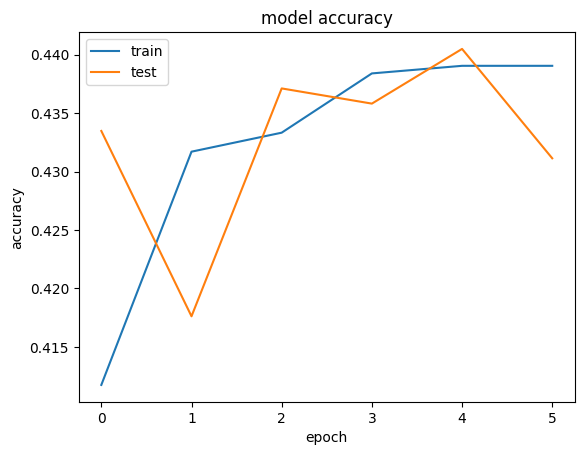

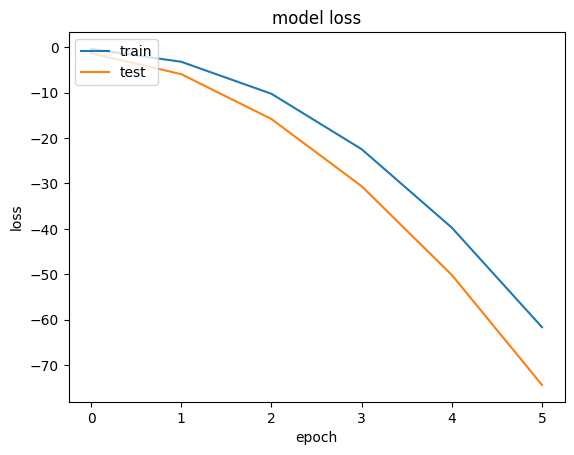

In [44]:
plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [26]:
# Second
lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, size, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32,return_sequences=False))
lstm_model.add(Dense(1, activation='sigmoid'))

In [27]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          9078300   
                                                                 
 lstm (LSTM)                 (None, 100, 128)          117248    
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9216189 (35.16 MB)
Trainable params: 137889 (538.63 KB)
Non-trainable params: 9078300 (34.63 MB)
_________________________________________________________________
None


In [28]:
lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=3, verbose=1, validation_split=0.2)

Epoch 1/3
250/250 [==============================] - 76s 285ms/step - loss: 0.5074 - acc: 0.7525 - val_loss: 0.5191 - val_acc: 0.7540
Epoch 2/3
250/250 [==============================] - 71s 284ms/step - loss: 0.4116 - acc: 0.8171 - val_loss: 0.3845 - val_acc: 0.8263
Epoch 3/3
250/250 [==============================] - 74s 296ms/step - loss: 0.3653 - acc: 0.8398 - val_loss: 0.3583 - val_acc: 0.8435


In [29]:
score = lstm_model.evaluate(X_test, y_test, verbose=1)
print("Score:", score[0], "Accuracy:", score[1])

313/313 [==============================] - 12s 38ms/step - loss: 0.3497 - acc: 0.8450
Score: 0.3497302234172821 Accuracy: 0.8450000286102295


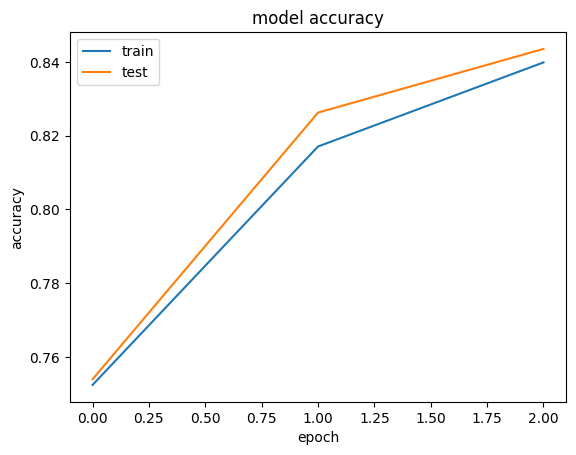

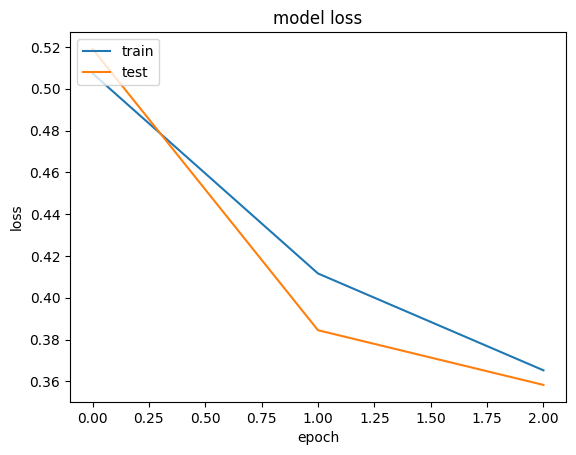

In [31]:
plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [32]:
lstm_model.predict(X_test[:10])

1/1 [==============================] - 1s 926ms/step


array([[0.67713463],
       [0.76574373],
       [0.89217544],
       [0.6527672 ],
       [0.01109199],
       [0.01819825],
       [0.4635127 ],
       [0.01908367],
       [0.02188162],
       [0.9028847 ]], dtype=float32)

In [33]:
y_test[:10]

array([0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])

In [35]:
lstm_model.save(f"./lstm_model_acc_{round(score[1], 3)}.h5", save_format='h5')

In [55]:
text = "I recently had the misfortune of making a bad purchase on Amazon that turned out to be a complete nightmare. The experience was so horrendous that I feel compelled to share my grievances and dissatisfaction with their service."
tokText = word_tokenizer.texts_to_sequences([text])
tokText = pad_sequences(tokText, padding='post', maxlen=maxlen)
answer = lstm_model.predict([tokText])
print(answer, tokText)

1/1 [==============================] - 0s 87ms/step
[[0.01869055]] [[  867  6525   123    15  3991  5131   526   462  1813   421  3354   127
   4798  1349 33848 26923  2043     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]]


In [56]:
actual_results = lstm_model.predict(X_test)
expected_results = y_test

313/313 [==============================] - 11s 36ms/step


In [57]:
score = [0,0,0,0]

lowrange = 0.35 #0.35
highrange = 0.85 #0.85

for i in range(len(expected_results)):
    if lowrange < actual_results[i] < highrange:
        score[1] += 1
    elif actual_results[i] > highrange and expected_results[i] >= highrange:
        score[2] += 1
    elif actual_results[i] < lowrange and expected_results[i] <= lowrange:
        score[0] += 1
    else:
        score[3] += 1

([<matplotlib.patches.Wedge at 0x24400a7c4c0>,
 [Text(0.49198557587242314, 0.9838445980608321, 'Negative'),
  Text(-1.0906643747379685, 0.14300776789194533, 'Positive'),
  Text(0.16593135903487724, -1.0874128857471015, 'Neutral'),
  Text(1.0818522781260498, -0.19898655309712932, 'False')],
 [Text(0.2683557686576853, 0.5366425080331811, '35.2%'),
  Text(-0.5949078407661645, 0.07800423703197018, '25.4%'),
  Text(0.09050801401902393, -0.5931343013166007, '33.6%'),
  Text(0.5901012426142088, -0.10853811987116144, '5.8%')])

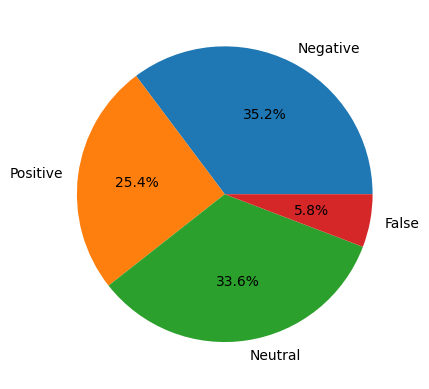

In [58]:
plt.pie(score, labels=["Negative", "Positive", "Neutral", "False"], autopct='%1.1f%%')